bier127_NNHonly

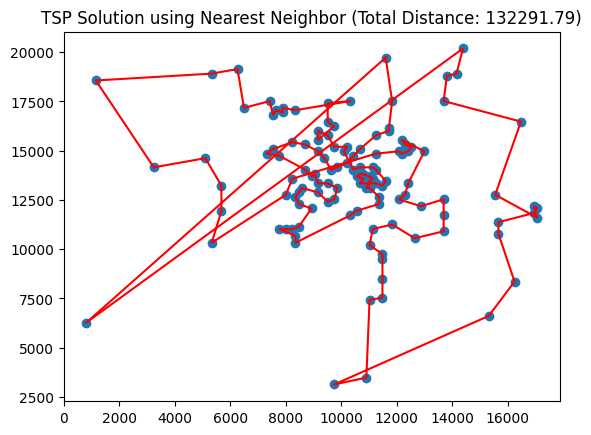

Time taken to render: 0.33561182022094727 seconds




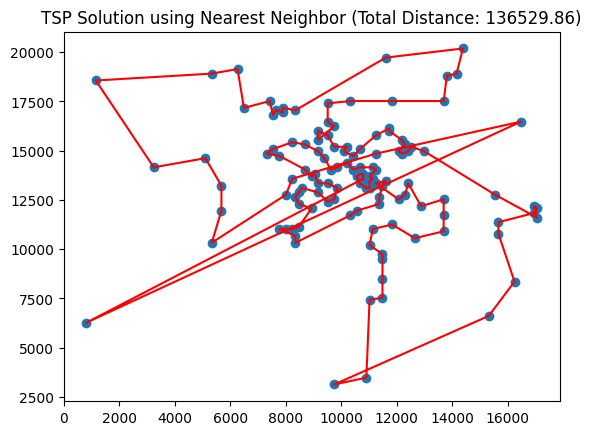

Time taken to render: 0.306835412979126 seconds




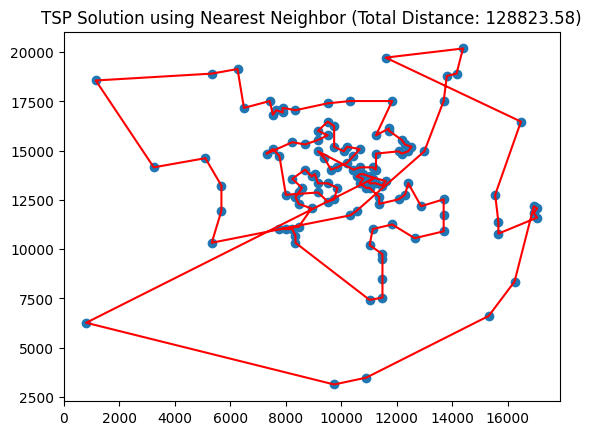

Time taken to render: 0.3746354579925537 seconds




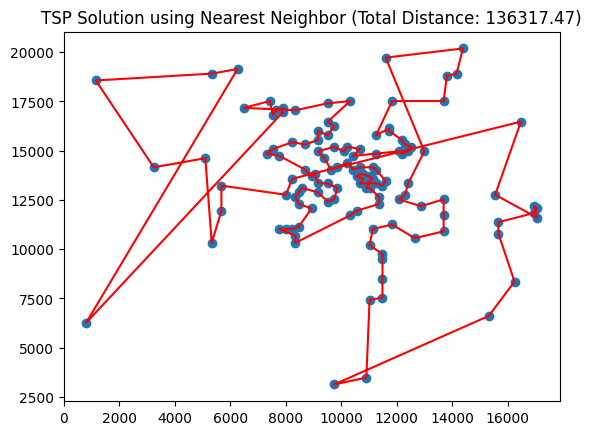

Time taken to render: 0.5009243488311768 seconds




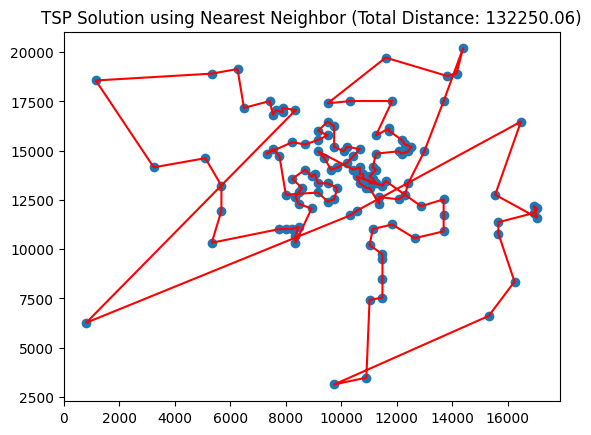

Time taken to render: 0.3038351535797119 seconds




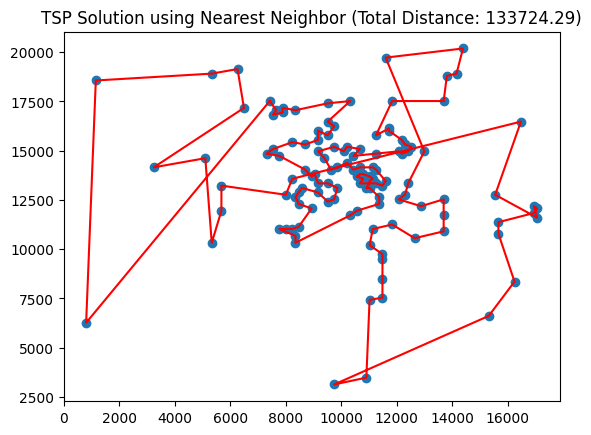

Time taken to render: 0.35655832290649414 seconds




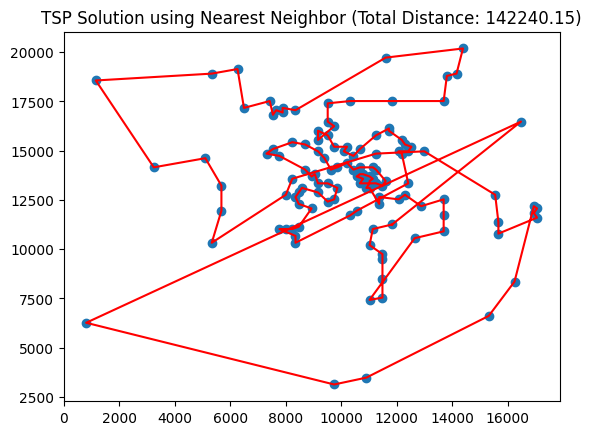

Time taken to render: 0.37122631072998047 seconds




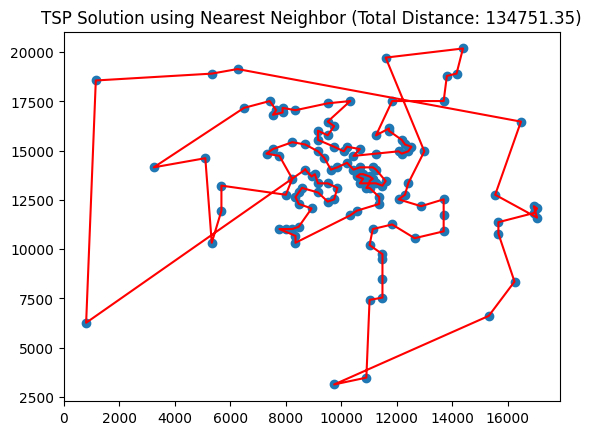

Time taken to render: 0.49083542823791504 seconds




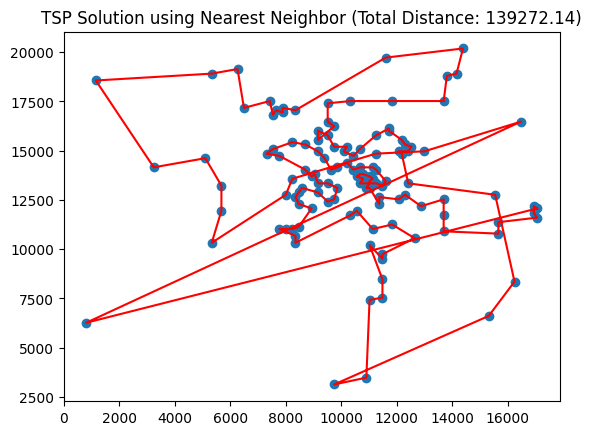

Time taken to render: 0.34121274948120117 seconds




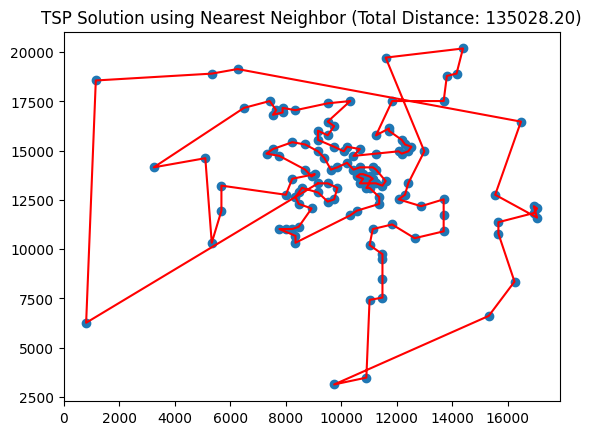

Time taken to render: 0.4961988925933838 seconds


Average Tour Length: 135122.88991643116
[(9860.0, 14152.0), (9396.0, 14616.0), (11252.0, 14848.0), (11020.0, 13456.0), (9512.0, 15776.0), (10788.0, 13804.0), (10208.0, 14384.0), (11600.0, 13456.0), (11252.0, 14036.0), (10672.0, 15080.0), (11136.0, 14152.0), (9860.0, 13108.0), (10092.0, 14964.0), (9512.0, 13340.0), (10556.0, 13688.0), (9628.0, 14036.0), (10904.0, 13108.0), (11368.0, 12644.0), (11252.0, 13340.0), (10672.0, 13340.0), (11020.0, 13108.0), (11020.0, 13340.0), (11136.0, 13572.0), (11020.0, 13688.0), (8468.0, 11136.0), (8932.0, 12064.0), (9512.0, 12412.0), (7772.0, 11020.0), (8352.0, 10672.0), (9164.0, 12876.0), (9744.0, 12528.0), (8352.0, 10324.0), (8236.0, 11020.0), (8468.0, 12876.0), (8700.0, 14036.0), (8932.0, 13688.0), (9048.0, 13804.0), (8468.0, 12296.0), (8352.0, 12644.0), (8236.0, 13572.0), (9164.0, 13340.0), (8004.0, 12760.0), (8584.0, 13108.0), (7772.0, 14732.0), (7540.0, 15080.0), (7424.0, 17516.0), (8352.0, 17052.0

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


bier127_NNHwith2OPT

Iteration 176: Improved total distance to 124184.88
Iteration 978: Improved total distance to 124067.04
Iteration 2723: Improved total distance to 122593.06
Iteration 2814: Improved total distance to 122547.46
Iteration 4796: Improved total distance to 122211.95
Iteration 5220: Improved total distance to 122152.98
Iteration 5666: Improved total distance to 121911.31
Iteration 7097: Improved total distance to 121797.50
Iteration 7808: Improved total distance to 120775.10
Iteration 10498: Improved total distance to 120766.40
Iteration 10499: Improved total distance to 120612.38
Iteration 10601: Improved total distance to 120244.80
Iteration 10998: Improved total distance to 120103.56
Iteration 13091: Improved total distance to 119292.97
Iteration 15669: Improved total distance to 118430.98
Iteration 15731: Improved total distance to 118279.91
Iteration 18578: Improved total distance to 118060.76
Iteration 18775: Improved total distance to 117835.81


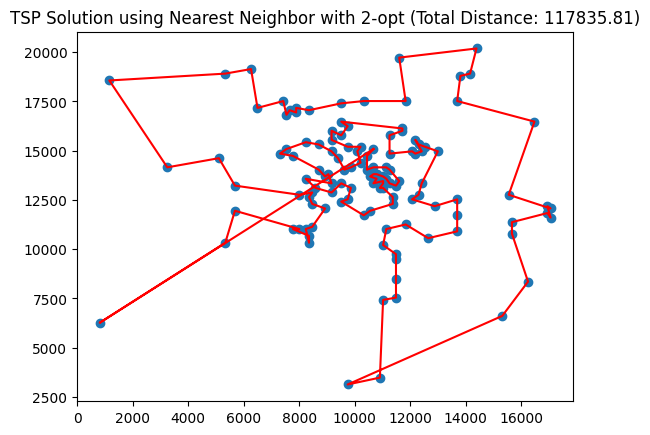

Time taken to render: 45.378382444381714 seconds


Iteration 56: Improved total distance to 143747.20
Iteration 371: Improved total distance to 143670.52
Iteration 372: Improved total distance to 139009.20
Iteration 374: Improved total distance to 138741.19
Iteration 426: Improved total distance to 138430.47
Iteration 427: Improved total distance to 138375.81
Iteration 428: Improved total distance to 138258.13
Iteration 432: Improved total distance to 138224.68
Iteration 433: Improved total distance to 138146.38
Iteration 475: Improved total distance to 137923.08
Iteration 476: Improved total distance to 136401.36
Iteration 555: Improved total distance to 136355.15
Iteration 1519: Improved total distance to 136242.72
Iteration 1599: Improved total distance to 136197.13
Iteration 4229: Improved total distance to 135986.90
Iteration 6055: Improved total distance to 135520.38
Iteration 6394: Improved total distance to 135062.59
Iteration 6671: Improved total distance to 134084.46
Iteratio

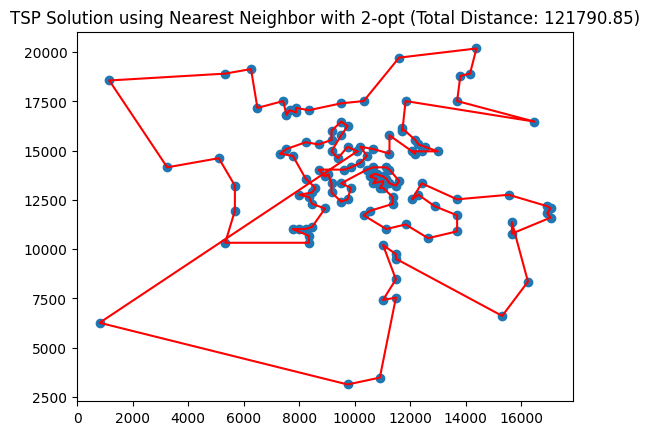

Time taken to render: 46.82433462142944 seconds


Iteration 4: Improved total distance to 136115.33
Iteration 124: Improved total distance to 135755.68
Iteration 371: Improved total distance to 133660.80
Iteration 1311: Improved total distance to 133010.87
Iteration 1436: Improved total distance to 132769.19
Iteration 4138: Improved total distance to 130819.05
Iteration 4637: Improved total distance to 130797.75
Iteration 5786: Improved total distance to 129974.66
Iteration 6381: Improved total distance to 129209.08
Iteration 6935: Improved total distance to 129091.24
Iteration 7856: Improved total distance to 127547.83
Iteration 7859: Improved total distance to 126683.86
Iteration 7876: Improved total distance to 126361.99
Iteration 7877: Improved total distance to 126088.43
Iteration 7878: Improved total distance to 125971.87
Iteration 8116: Improved total distance to 125501.32
Iteration 13405: Improved total distance to 124990.84
Iteration 14355: Improved total distance to 124161.44

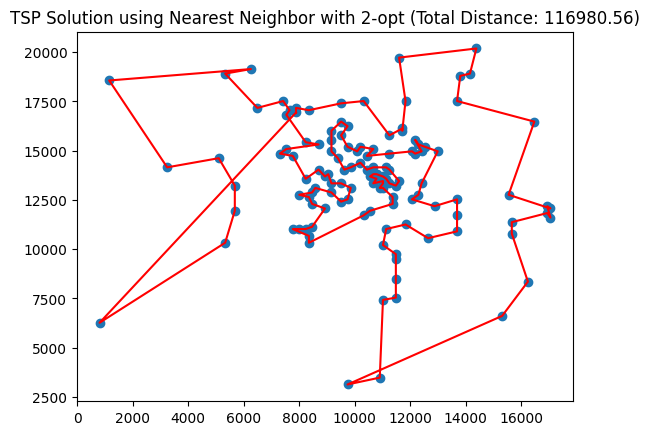

Time taken to render: 64.5568253993988 seconds


Iteration 124: Improved total distance to 135981.90
Iteration 147: Improved total distance to 134362.74
Iteration 753: Improved total distance to 132893.47
Iteration 883: Improved total distance to 132883.26
Iteration 885: Improved total distance to 132862.82
Iteration 1003: Improved total distance to 132699.18
Iteration 1118: Improved total distance to 132529.71
Iteration 1119: Improved total distance to 132002.55
Iteration 1347: Improved total distance to 131994.72
Iteration 1402: Improved total distance to 131829.52
Iteration 1413: Improved total distance to 131176.96
Iteration 1433: Improved total distance to 131149.69
Iteration 1443: Improved total distance to 130930.79
Iteration 3503: Improved total distance to 130087.46
Iteration 4388: Improved total distance to 129997.60
Iteration 4793: Improved total distance to 129246.31
Iteration 4871: Improved total distance to 128975.96
Iteration 5024: Improved total distance to 128909.85
It

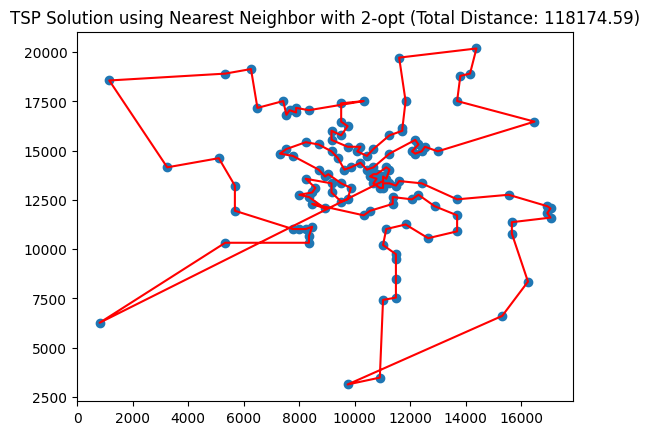

Time taken to render: 51.40628743171692 seconds


Iteration 123: Improved total distance to 137222.43
Iteration 124: Improved total distance to 133199.57
Iteration 134: Improved total distance to 133013.15
Iteration 205: Improved total distance to 129678.98
Iteration 251: Improved total distance to 129437.31
Iteration 3356: Improved total distance to 129405.15
Iteration 3363: Improved total distance to 128994.05
Iteration 4000: Improved total distance to 128991.26
Iteration 4002: Improved total distance to 128853.06
Iteration 4871: Improved total distance to 127379.08
Iteration 4938: Improved total distance to 127333.49
Iteration 6501: Improved total distance to 126954.49
Iteration 7097: Improved total distance to 126618.98
Iteration 7287: Improved total distance to 126560.01
Iteration 7808: Improved total distance to 125537.60
Iteration 7909: Improved total distance to 125259.18
Iteration 7910: Improved total distance to 124977.29
Iteration 8034: Improved total distance to 124833.35
I

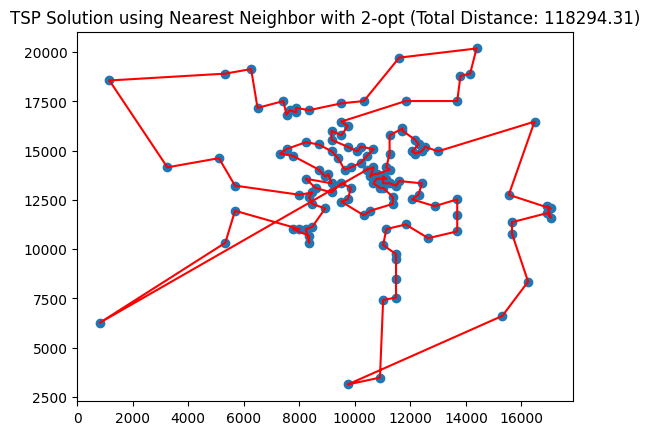

Time taken to render: 52.69788146018982 seconds


Average Tour Length: 118615.22384688321
Average Time taken to render: 52.17274227142334 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(5):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


bier127_NNHwith3OPT

Iteration 365: Improved total distance to 129391.83
Iteration 70957: Improved total distance to 128393.24
Iteration 71123: Improved total distance to 128250.90
Iteration 71709: Improved total distance to 127825.94
Iteration 116894: Improved total distance to 126966.14
Iteration 124922: Improved total distance to 126925.37
Iteration 128779: Improved total distance to 126074.52
Iteration 250720: Improved total distance to 125913.23
Iteration 256096: Improved total distance to 125887.38
Iteration 258181: Improved total distance to 125834.77
Iteration 315160: Improved total distance to 125337.98
Iteration 573650: Improved total distance to 125217.29
Iteration 712460: Improved total distance to 123996.85
Iteration 750856: Improved total distance to 123814.11
Iteration 823578: Improved total distance to 123402.15
Iteration 824019: Improved total distance to 121866.62
Iteration 940951: Improved total distance to 121578.72
Iteration 1066850: Improved total distance to 120722.23
Iteration 10734

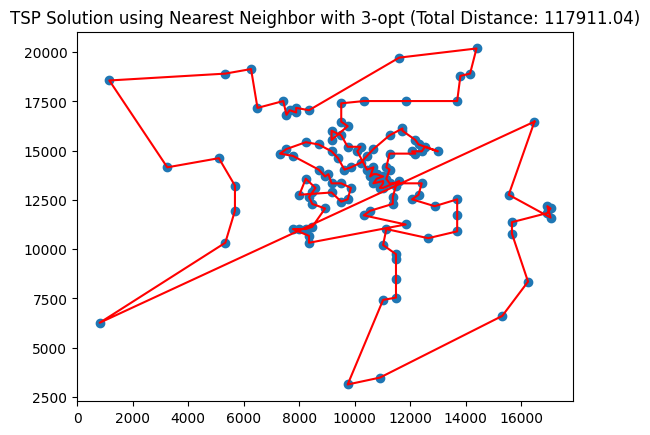

Time taken to render: 277.43204069137573 seconds


Iteration 331: Improved total distance to 132063.13
Iteration 6112: Improved total distance to 131731.16
Iteration 7485: Improved total distance to 130972.66
Iteration 101840: Improved total distance to 130855.10
Iteration 113695: Improved total distance to 129857.78
Iteration 151188: Improved total distance to 129330.88
Iteration 151368: Improved total distance to 126498.38
Iteration 155761: Improved total distance to 126092.20
Iteration 492624: Improved total distance to 126071.53
Iteration 633210: Improved total distance to 125989.79


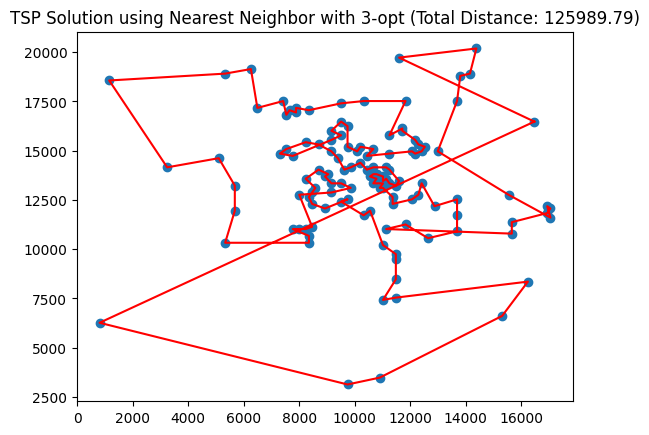

Time taken to render: 121.12914061546326 seconds


Iteration 1375: Improved total distance to 130042.86
Iteration 119214: Improved total distance to 128483.69
Iteration 145967: Improved total distance to 128092.26
Iteration 183646: Improved total distance to 126727.03
Iteration 313447: Improved total distance to 126606.15
Iteration 316787: Improved total distance to 125997.14
Iteration 501642: Improved total distance to 125531.31
Iteration 540221: Improved total distance to 125349.41
Iteration 620323: Improved total distance to 125231.57
Iteration 949001: Improved total distance to 125055.24


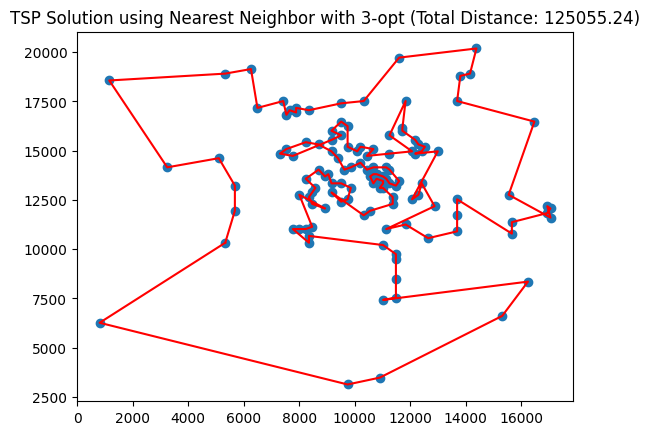

Time taken to render: 155.9620759487152 seconds


Average Tour Length: 122985.35798190179
Average Time taken to render: 184.8410857518514 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")
